In [49]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#Genderize 1
def getGenders(names):
    url = ""
    cnt = 0
    if not isinstance(names,list):
        names = [names,]

    for name in names:
        if url == "":
            url = "name[0]=" + name
        else:
            cnt += 1
            url = url + "&name[" + str(cnt) + "]=" + name


    req = requests.get("https://api.genderize.io?" + url)
    results = json.loads(req.text)

    retrn = []
    for result in results:
        if result["gender"] is not None:
            retrn.append((result["name"],result["gender"], result["probability"]))
        else:
            retrn.append((u'None',u'0.0'))
    return retrn

Gender_predict_record = pd.DataFrame(getGenders(["Panadda","Park","Minnie","Milk","Parichat", "Jack", "Rose","SunFlower"]))
Gender_predict_record.rename(columns={
        0: 'Name', 
        1: 'Gender_Prediction',
        2: 'Probability'
    }, inplace=True)
Gender_predict_record

,Name,Gender_Prediction,Probability
0,Panadda,female,0.99
1,Park,male,0.80
2,Minnie,female,0.97
3,Milk,male,0.57
4,Parichat,female,0.99
5,Jack,male,0.98
6,Rose,female,0.97
7,SunFlower,female,0.92


In [20]:
# USA POPULATION DATA
# 2
USAPP = requests.get("https://datausa.io/api/data?drilldowns=Nation&measures=Population")
txt = USAPP.json()
Population_USA_table = pd.DataFrame(txt["data"])
Population_USA_table = Population_USA_table.sort_values(['Year'], ascending=[1])
Population_USA_table


,ID Nation,Nation,ID Year,Year,Population,Slug Nation
6,01000US,United States,2013,2013,316128839,united-states
5,01000US,United States,2014,2014,318857056,united-states
4,01000US,United States,2015,2015,321418821,united-states
3,01000US,United States,2016,2016,323127515,united-states
2,01000US,United States,2017,2017,325719178,united-states
1,01000US,United States,2018,2018,327167439,united-states
0,01000US,United States,2019,2019,328239523,united-states


<AxesSubplot:title={'center':'Population of USA 2013 to 2019'}, xlabel='Year'>

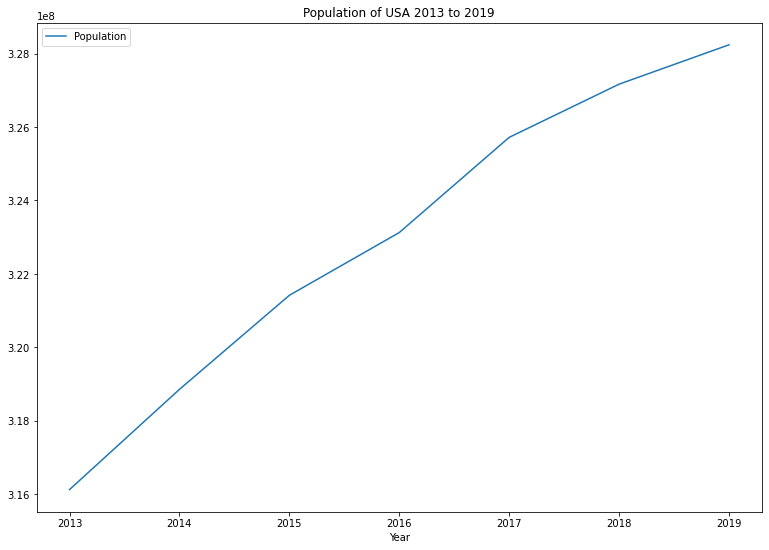

In [21]:
Population_USA_table.plot(title='Population of USA 2013 to 2019',x='Year', y='Population',figsize=(13,9))

<BarContainer object of 3 artists>

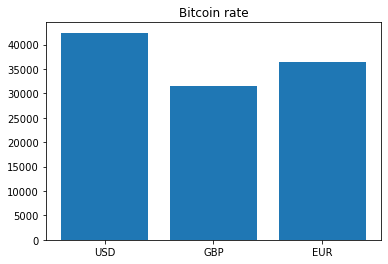

In [34]:
# COINPRICE 3
COINPRICE_TABLE = pd.DataFrame([])
COINPRICE = requests.get("https://api.coindesk.com/v1/bpi/currentprice.json")
txt = COINPRICE.json()
COINPRICE_TABLE = pd.DataFrame(txt["bpi"])

COINPRICE_TABLE = COINPRICE_TABLE.drop('symbol')
COINPRICE_TABLE_Trans = COINPRICE_TABLE.T

label = COINPRICE_TABLE_Trans['code']
height = COINPRICE_TABLE_Trans['rate_float']

fig, ax = plt.subplots()
ax.set_title('Bitcoin rate')
ax.bar(label, height)


In [37]:
COINPRICE.status_code

200

In [38]:
txt

{'time': {'updated': 'Sep 29, 2021 12:01:00 UTC',
  'updatedISO': '2021-09-29T12:01:00+00:00',
  'updateduk': 'Sep 29, 2021 at 13:01 BST'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '42,419.4167',
   'description': 'United States Dollar',
   'rate_float': 42419.4167},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '31,412.5961',
   'description': 'British Pound Sterling',
   'rate_float': 31412.5961},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '36,382.3277',
   'description': 'Euro',
   'rate_float': 36382.3277}}}

In [54]:
#Zippopotam 4
req = requests.get("https://api.zippopotam.us/us/33162")
txt = req.json()

In [57]:
def json_print(obj):
    txt = json.dumps(obj, sort_keys=True, indent=4)
    print(txt)  

In [58]:
json_print(req.json())

{
    "country": "United States",
    "country abbreviation": "US",
    "places": [
        {
            "latitude": "25.9286",
            "longitude": "-80.183",
            "place name": "Miami",
            "state": "Florida",
            "state abbreviation": "FL"
        }
    ],
    "post code": "33162"
}


In [63]:
with open('ip_info.json','w') as f:
    json.dump(req.json(),f)
with open('ip_info.json') as json_data:
    dataset = json.load(json_data)
dataset = dataset
df = pd.DataFrame(dataset)

In [64]:
df

,post code,country,country abbreviation,places
0,33162,United States,US,"{'place name': 'Miami', 'longitude': '-80.183'..."


In [53]:
req.status_code

200

In [66]:
# Bored 5
boredapi = requests.get("https://www.boredapi.com/api/activity/")
txtbored = boredapi.json()
Random_Activity = txtbored["activity"]
Type_Activity = txtbored["type"]
print(Type_Activity,"activity :", Random_Activity)

social activity : Go to a concert with some friends
